<a href="https://colab.research.google.com/github/pathak-gaurav/machine_learning_course/blob/master/Intro_to_ML_infy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Supervised Machine Learning**

---




1.   Labelling of dataset will be available.
2.   Train the model based on the available labels.
3.   Test the model.
4.   Deploy the model.

Example: Prediction of House Price.


**Regression** 
Building a relationship between dependent and Independent Variables
            Y = MX + C

Inputs: 1,2,3,4 ==> X (Independent)
Target: Y ==> (Dependent Variable)
M and C: Using this we can find target

Build a model 'b' using x values to find the M and C
Test the model  by applying different M and C
Evulate how much close tour X is from predicted

f(x) = B0+b1X1+E  (Simple Linear Regression)
B0, B1 - Coefficients and E is the Error

f(x) = B0+b1X1+B2X2+E (Multiple Linear Regression - Two or more independent 
                        Variable)



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df  = pd.read_csv('effort.csv')
df

,Units,Minutes
0,1,23
1,2,32
2,3,40
3,4,49
4,5,58
5,6,65
6,6,68
7,7,74
8,8,79
9,9,85


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Units    12 non-null     int64
 1   Minutes  12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


In [27]:
df.describe()

,Units,Minutes
count,12.000000,12.000000
mean,5.916667,63.250000
std,3.028901,23.371019
min,1.000000,23.000000
25%,3.750000,46.750000
50%,6.000000,66.500000
75%,8.250000,80.500000
max,10.000000,95.000000


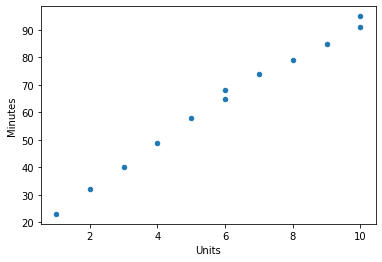

In [28]:
df.plot(kind="scatter",x="Units",y="Minutes")

In [29]:
mean_value = df.Minutes.mean()
mean_value

63.25

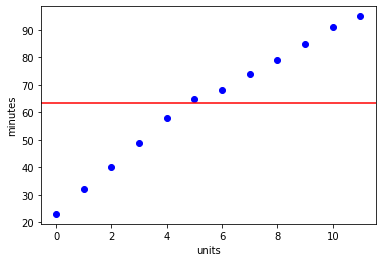

In [30]:
plt.xlabel("units")
plt.ylabel("minutes")
plt.plot(df.Minutes,'bo') #bo is blue circle
plt.axhline(y=mean_value,c='r') #r is for red colour

In [32]:
#Creating Models

model_0 = df.Minutes.mean()
model_1 = 10+12*df.Units
model_2 = 6+18*df.Units

df['Model_0'] = model_0
df['Model_1'] = model_1
df['Model_2'] = model_2 
df

,Units,Minutes,Model_0,Model_1,Model_2
0,1,23,63.25,22,24
1,2,32,63.25,34,42
2,3,40,63.25,46,60
3,4,49,63.25,58,78
4,5,58,63.25,70,96
5,6,65,63.25,82,114
6,6,68,63.25,82,114
7,7,74,63.25,94,132
8,8,79,63.25,106,150
9,9,85,63.25,118,168


Text(0.5, 1.0, 'Speculated Models')

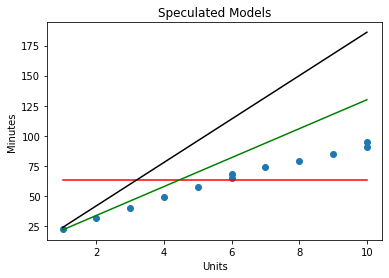

In [35]:
fig,ax = plt.subplots()
ax.scatter(x='Units',y='Minutes',data=df)
ax.add_line(plt.Line2D(df.Units,df.Model_0,color="red"))
ax.add_line(plt.Line2D(df.Units,df.Model_1,color="green"))
ax.add_line(plt.Line2D(df.Units,df.Model_2,color="black"))
ax.set_xlabel('Units')
ax.set_ylabel('Minutes')
ax.set_title('Speculated Models')

In [36]:
model_0_observation = pd.DataFrame(np.array([df.Units,df.Minutes,df.Model_0,df.Model_0-df.Minutes]).T, 
                                   columns=["unites","Actual","Predicted Time","Error"])
model_0_observation

,unites,Actual,Predicted Time,Error
0,1.0,23.0,63.25,40.25
1,2.0,32.0,63.25,31.25
2,3.0,40.0,63.25,23.25
3,4.0,49.0,63.25,14.25
4,5.0,58.0,63.25,5.25
5,6.0,65.0,63.25,-1.75
6,6.0,68.0,63.25,-4.75
7,7.0,74.0,63.25,-10.75
8,8.0,79.0,63.25,-15.75
9,9.0,85.0,63.25,-21.75


In [37]:
sum(model_0_observation.Error)

0.0

In [38]:
sum(model_0_observation.Error**2)

6008.25

In [39]:
model_1_observation = pd.DataFrame(np.array([df.Units,df.Minutes,df.Model_1,df.Model_1-df.Minutes]).T, 
                                   columns=["unites","Actual","Predicted Time","Error"])
model_1_observation

,unites,Actual,Predicted Time,Error
0,1,23,22,-1
1,2,32,34,2
2,3,40,46,6
3,4,49,58,9
4,5,58,70,12
5,6,65,82,17
6,6,68,82,14
7,7,74,94,20
8,8,79,106,27
9,9,85,118,33


In [40]:
sum(model_1_observation.Error)

213

In [41]:
sum(model_1_observation.Error**2)

5715

In [42]:
model_2_observation = pd.DataFrame(np.array([df.Units,df.Minutes,df.Model_2,df.Model_2-df.Minutes]).T, 
                                   columns=["unites","Actual","Predicted Time","Error"])
model_2_observation

,unites,Actual,Predicted Time,Error
0,1,23,24,1
1,2,32,42,10
2,3,40,60,20
3,4,49,78,29
4,5,58,96,38
5,6,65,114,49
6,6,68,114,46
7,7,74,132,58
8,8,79,150,71
9,9,85,168,83


In [43]:
sum(model_2_observation.Error)

591

In [44]:
sum(model_2_observation.Error**2)

39903

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X=df.loc[:,["Units"]]
Y=df.loc[:,["Minutes"]]
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
model.intercept_

array([17.79768786])

In [47]:
model.coef_

array([[7.68208092]])

In [48]:
 x= df.Units
 y = df.Minutes
 xiyi = x*y

 n = len(df)
 xmean = df.Units.mean()
 ymean = df.Minutes.mean()

 numerator = xiyi.sum() - n*xmean*ymean
 denominator = (x**2).sum() - n*(xmean**2)

 b1 = numerator/denominator
 b0 = ymean-(b1*xmean)
 
 print(b0,b1)

17.797687861271655 7.682080924855494


In [0]:
min_best_fit_model = b0+b1*df.Units
df['min_best_fit_model'] = min_best_fit_model

In [51]:
df.loc[:,["Units","Minutes","min_best_fit_model"]]

,Units,Minutes,min_best_fit_model
0,1,23,25.479769
1,2,32,33.161850
2,3,40,40.843931
3,4,49,48.526012
4,5,58,56.208092
5,6,65,63.890173
6,6,68,63.890173
7,7,74,71.572254
8,8,79,79.254335
9,9,85,86.936416


Text(0.5, 1.0, 'Best Fit Models')

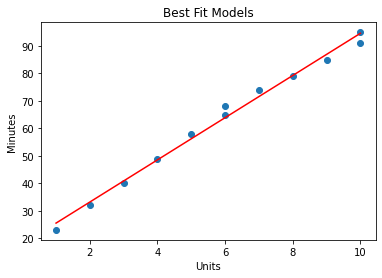

In [52]:
fig,ax = plt.subplots()
ax.scatter(x='Units',y='Minutes',data=df)
ax.add_line(plt.Line2D(df.Units,df.min_best_fit_model,color="red"))
ax.set_xlabel('Units')
ax.set_ylabel('Minutes')
ax.set_title('Best Fit Models')

**UnSupervised Machine Learning**

---




1.   Labelling of dataset will not be available.
2.   Train the model based on clustering.
3.   Test the model.
4.   Deploy the model.

Example: News Classification Segmentation.


**SemiSupervised Machine Learning**

---




1.   Between Supervised and UnSupervised ML

Example: Speech Analysis
